In [289]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, MeanShift,  AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [290]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/nimoru7/schulich_data_science/refs/heads/main/Customer_Data.csv')

# **Data Exploration and Cleaning**

In [291]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [292]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [294]:
# Check for nulls
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [295]:
# CREDIT_LIMIT has one null so we will just drop it
df = df.dropna(subset=['CREDIT_LIMIT'])

In [296]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


Look into MINIMUM_PAYMENTS column to see which imputation method would be best

In [297]:
print(df['MINIMUM_PAYMENTS'].describe())


count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [298]:
# Check the skewness
print("Skewness:", df['MINIMUM_PAYMENTS'].skew())

Skewness: 13.622193089492017


In [299]:
# Visualize distribution

Text(0.5, 1.0, 'MINIMUM_PAYMENTS Boxplot')

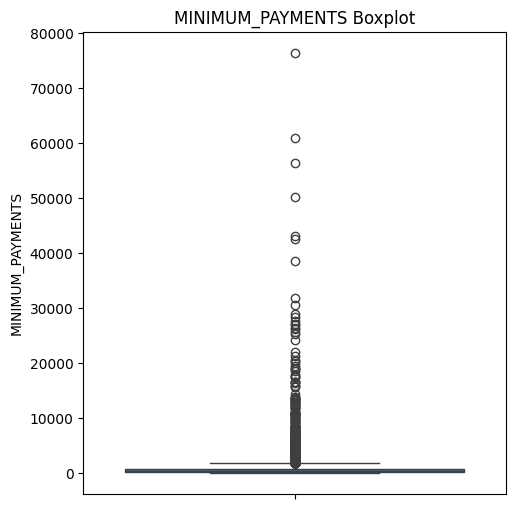

In [300]:
plt.figure(figsize=(12, 6))

# Boxplot for MINIMUM_PAYMENTS
plt.subplot(1, 2, 1)
sns.boxplot(y=df['MINIMUM_PAYMENTS'])
plt.title('MINIMUM_PAYMENTS Boxplot')

Given there are extreme outliers and that it has high skewness, we will impute using median

In [301]:
# Fill missing values in 'MINIMUM_PAYMENTS' with the median
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

<ipython-input-301-4695b74fca84>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)


In [302]:
# Initialize KNN Imputer
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)

# Fill in missing values
# df['MINIMUM_PAYMENTS'] = knn_imputer.fit_transform(df[['MINIMUM_PAYMENTS']])

In [303]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [304]:
# Check for duplicates
df.duplicated ().sum ()

0

In [305]:
df.nunique()

,0
CUST_ID,8949
BALANCE,8870
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4322
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


In [306]:
# Since CUST_ID is categorical and used to identify rows, we will convert it to an index
df.set_index('CUST_ID', inplace=True)

In [307]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Feature Engineering

In [308]:
# Create new features
df['BALANCE_TO_CREDIT_RATIO'] = df['BALANCE'] / df['CREDIT_LIMIT']
df['PAYMENTS_TO_PURCHASES_RATIO'] = df['PAYMENTS'] / df['PURCHASES']

In [309]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_TO_CREDIT_RATIO,PAYMENTS_TO_PURCHASES_RATIO
CUST_ID,,,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0.040901,2.115326
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.457495,inf
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.332687,0.804567
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,0.222223,0.000000
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.681429,42.395923


In [310]:
# Replace inf and -inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
df.dropna(inplace=True)

In [311]:
# Correlation matrix
correlation_matrix = df.corr()

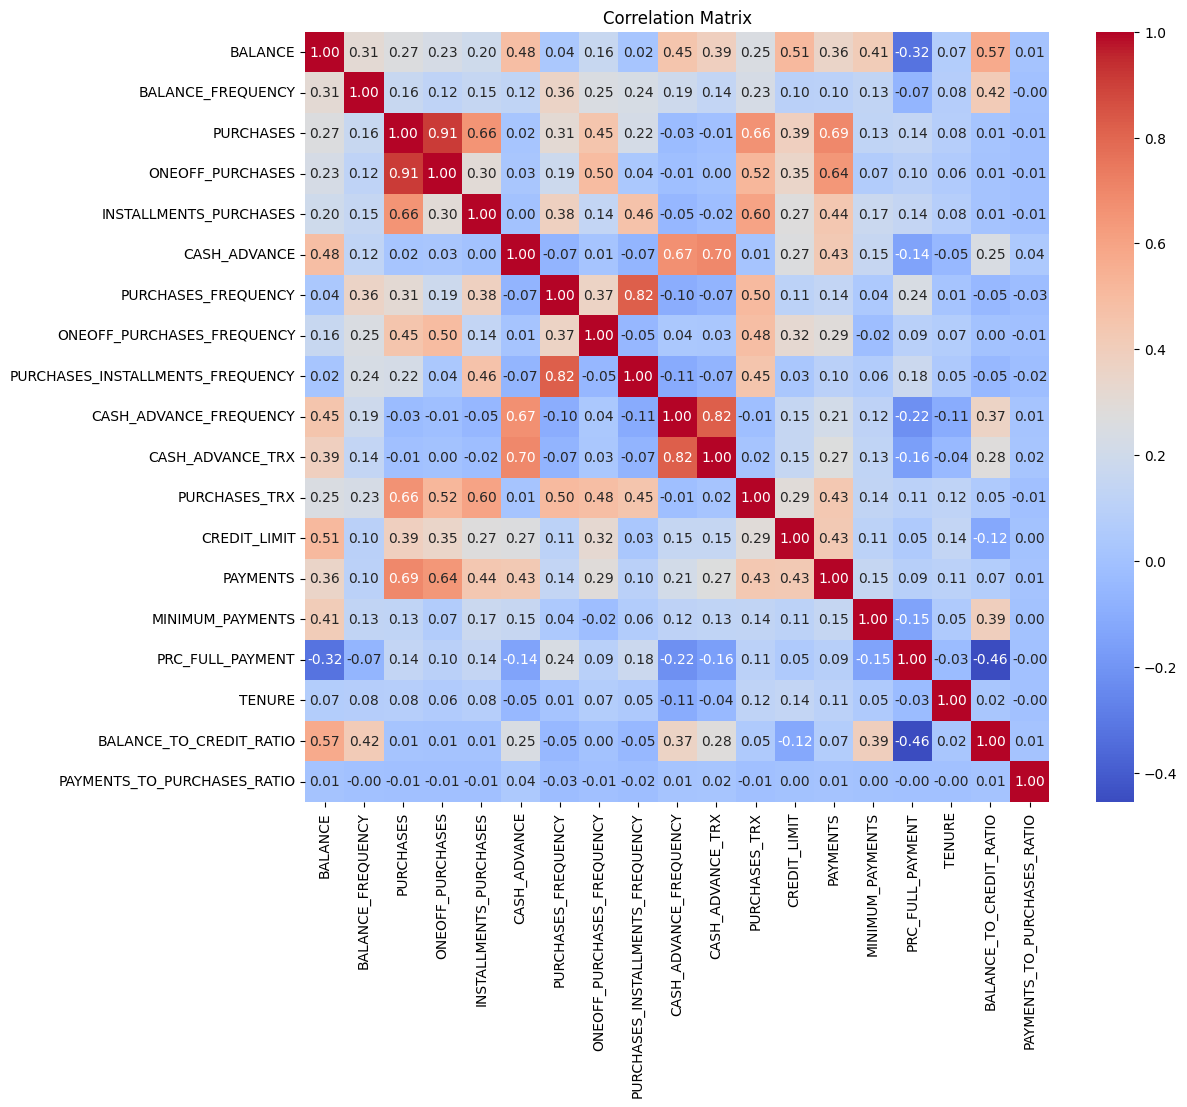

In [312]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Outliers

In [313]:
# Count outliers in each column using IQR

def count_outliers_iqr(df):
  outlier_counts = {}
  for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_counts[column] = len(outliers)

  return pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])

# Count
outlier_counts_df = count_outliers_iqr(df)
outlier_counts_df

,Outlier Count
BALANCE,601
BALANCE_FREQUENCY,1148
PURCHASES,604
ONEOFF_PURCHASES,626
INSTALLMENTS_PURCHASES,556
CASH_ADVANCE,1267
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,1202


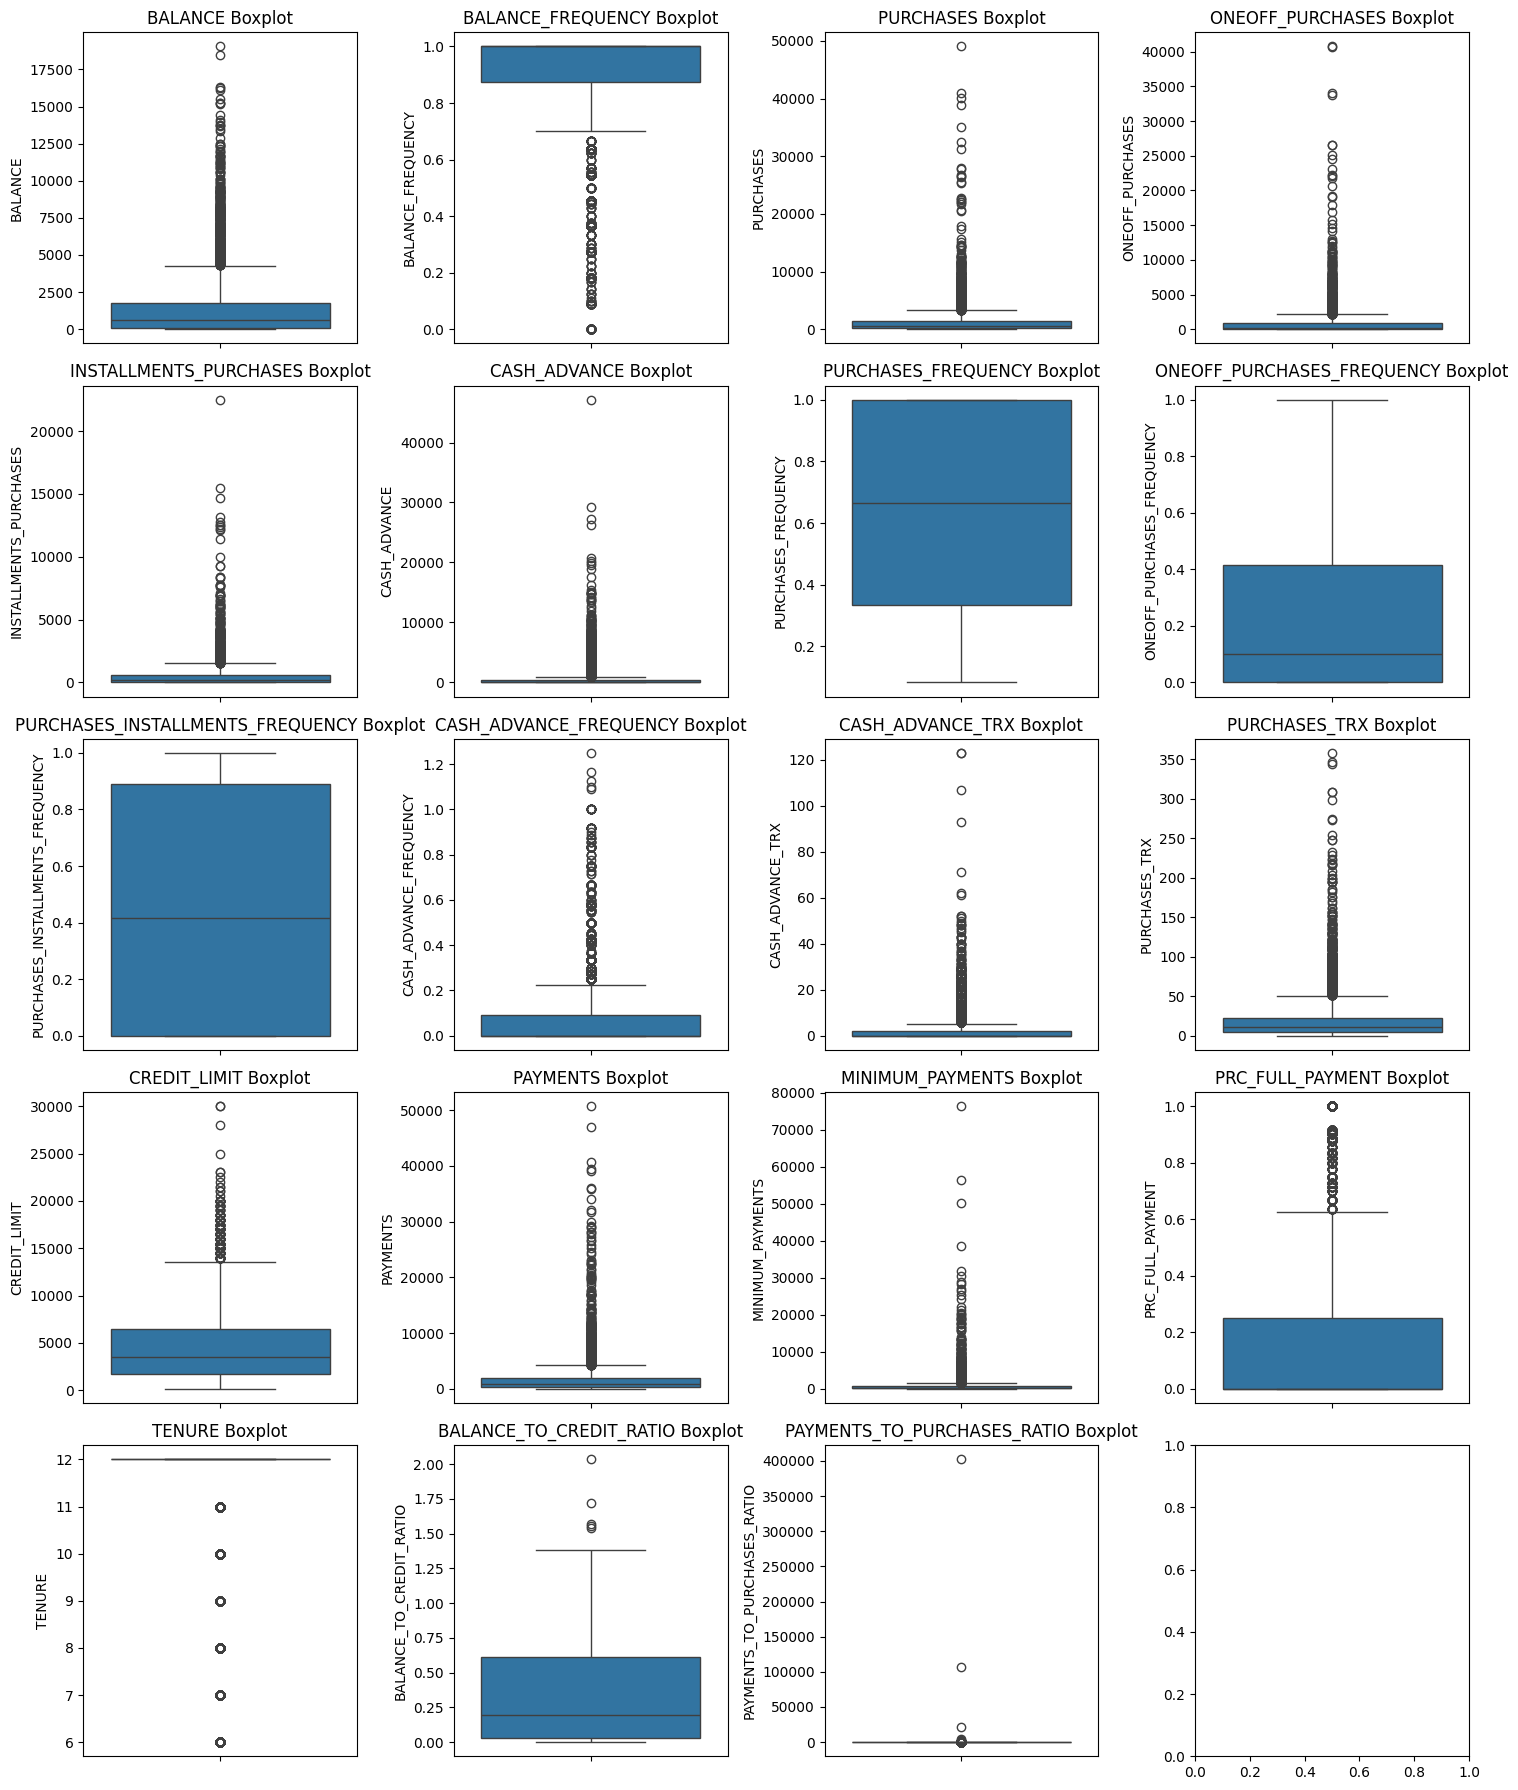

In [314]:
# Boxplots to visualize outliers
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

There are lots of outliers, we will have to winsorize

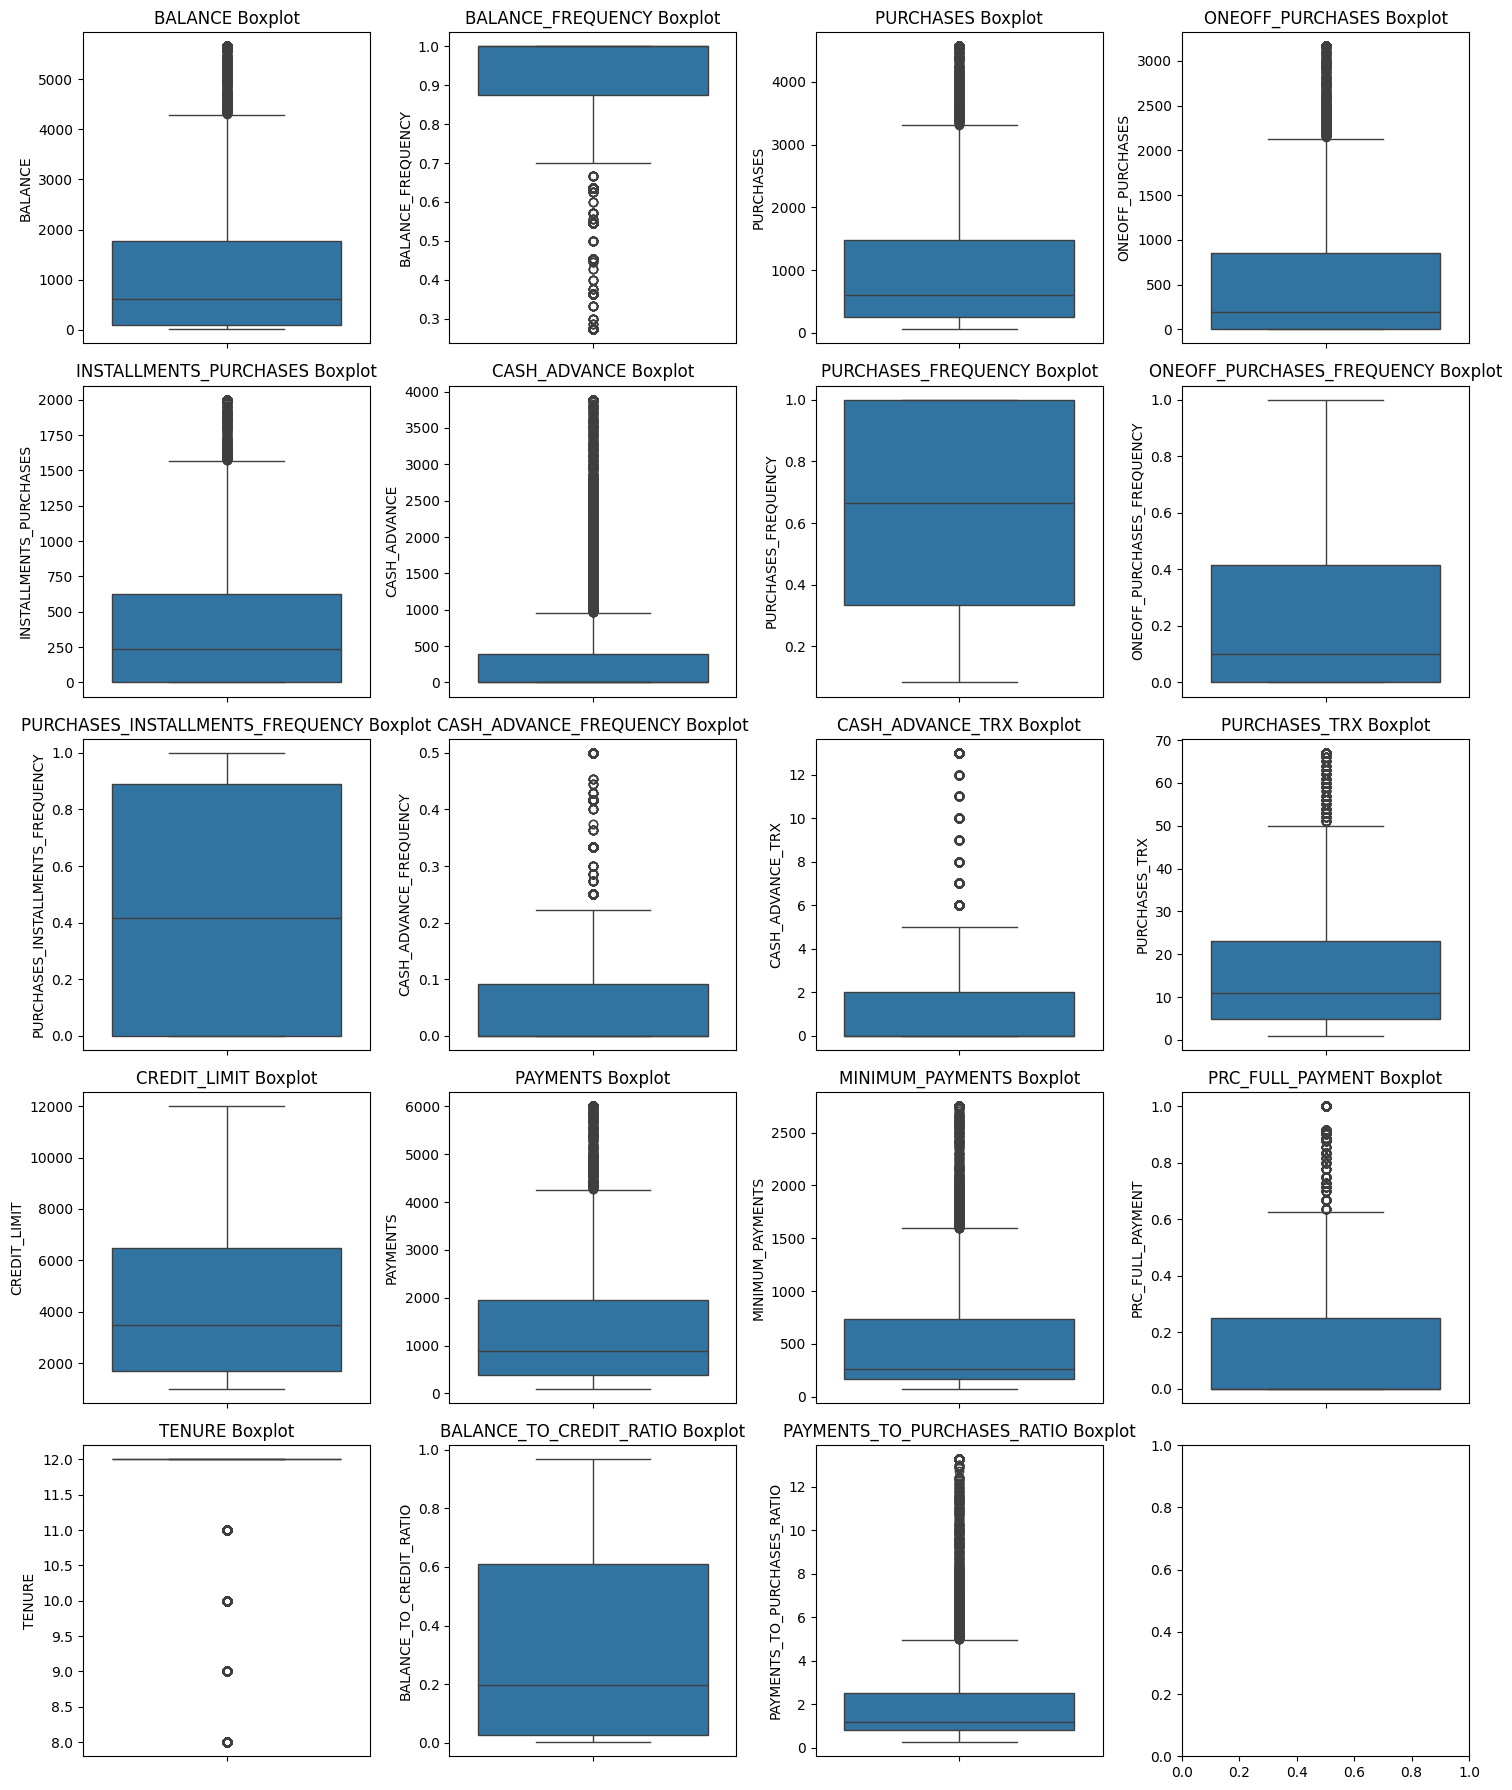

In [315]:
# Winsorize dataset to handle the outliers and cap extreme 5% values on both sides

from scipy.stats.mstats import winsorize

# Define the limits for winsorization
limits = 0.05

# Apply winsorization to each numerical column
for column in df.select_dtypes(include=np.number).columns:
  df[column] = winsorize(df[column], limits=limits)

# You can now visualize the boxplots again to see the effect of winsorization
fig, axes = plt.subplots(5, 4, figsize=(15, 18))
axes = axes.flatten()

# Loop through each numeric column and create boxplots
for i, col in enumerate(df):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

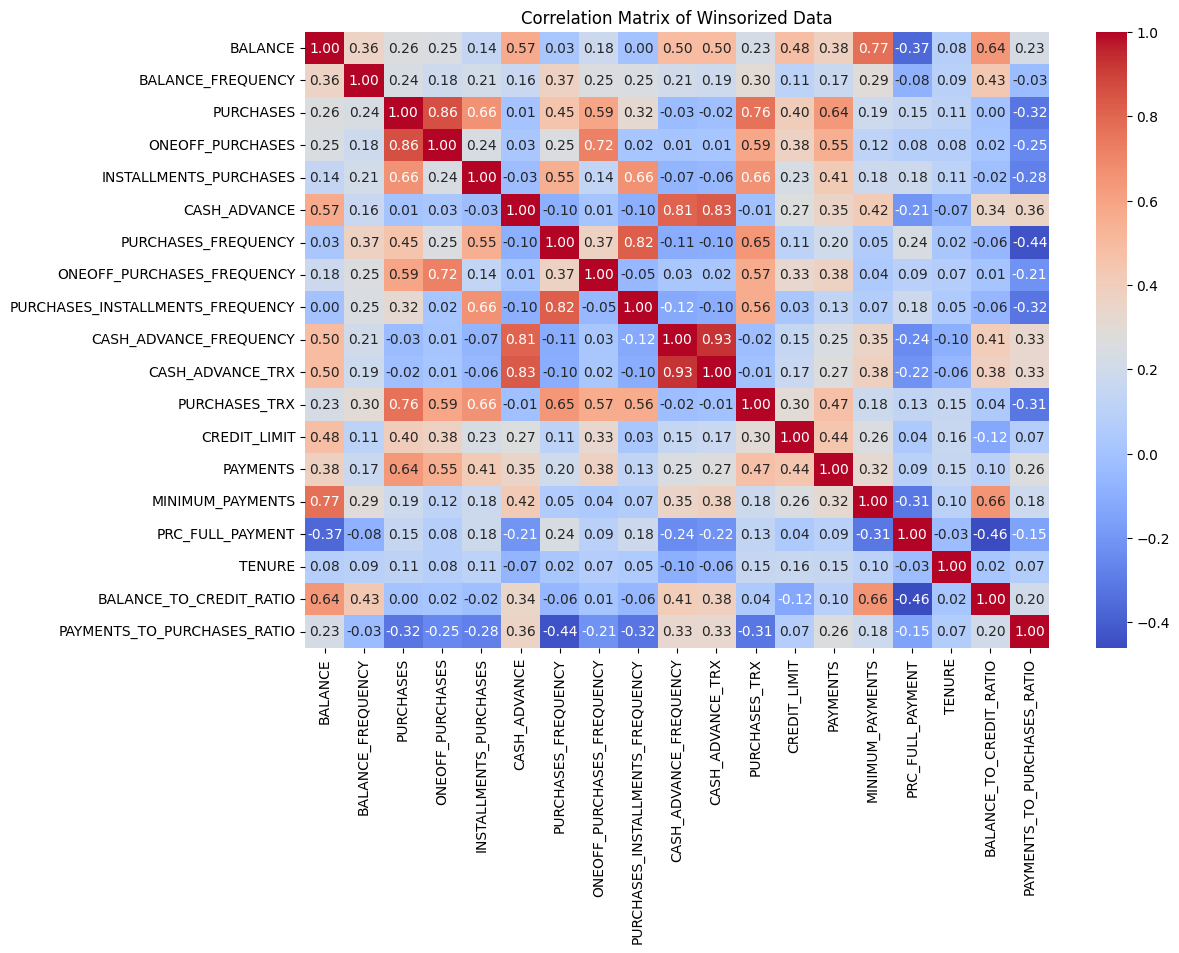

In [316]:
# Compute the correlation matrix of the Winsorized data
corr_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Winsorized Data')
plt.show()

# **EDA**

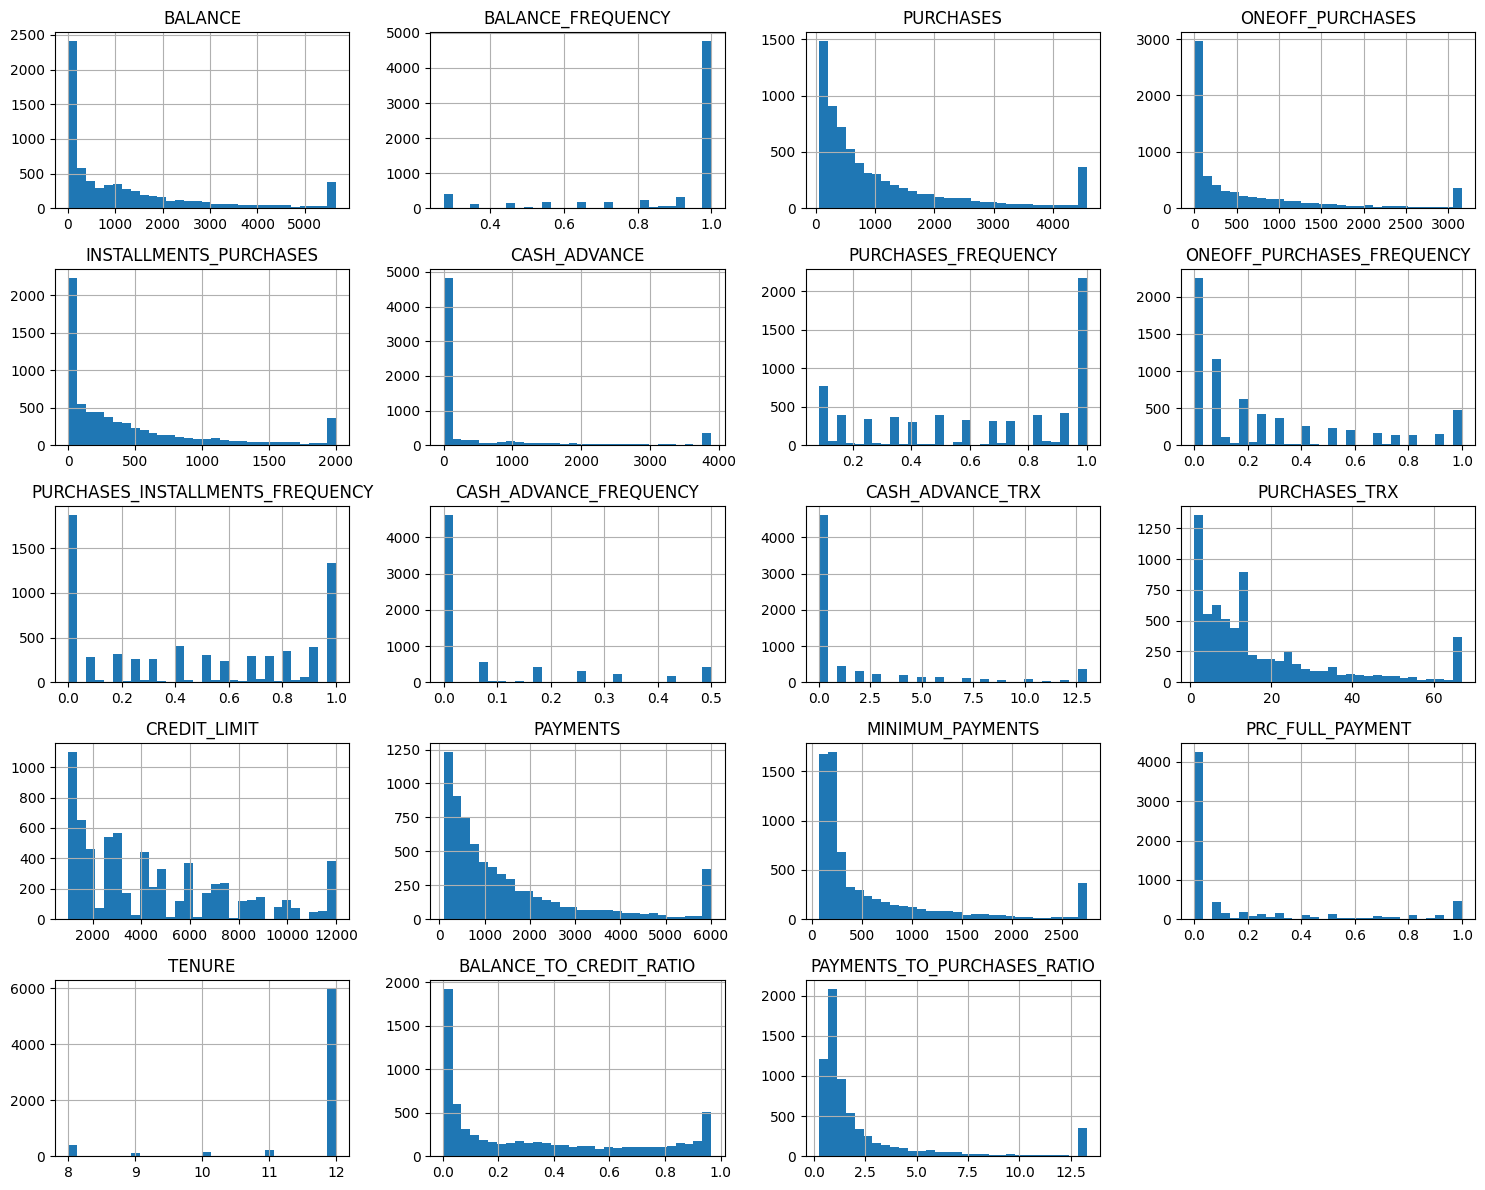

In [317]:
# Plot histograms for all columns
df.hist(bins=30, figsize=(15, 12), layout=(5, 4))
plt.tight_layout()
plt.show()

In [318]:
# Plot pairplot for selected variables to see pairwise relationships
#sns.pairplot(df)
#plt.show()

# Customer Behaviours Investigation

Purchasing Behaviour Relationships

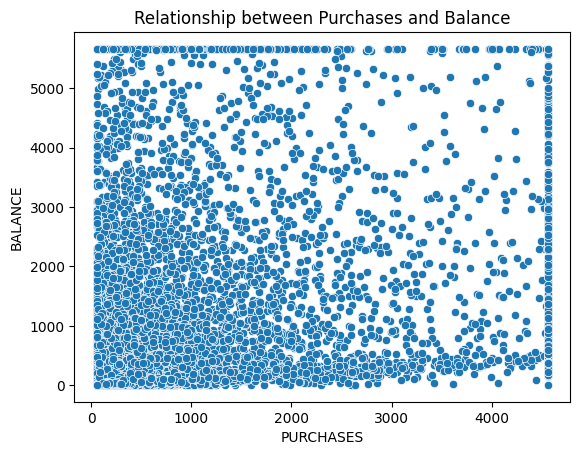

In [319]:
sns.scatterplot(x='PURCHASES', y='BALANCE', data=df)
plt.title('Relationship between Purchases and Balance')
plt.show()

Purchases vs Balance: Customers with lower purchases tend to have balances spread across a wide range, while those with high balances also show a diverse range of purchases, indicating no direct correlation between total spending and balance.

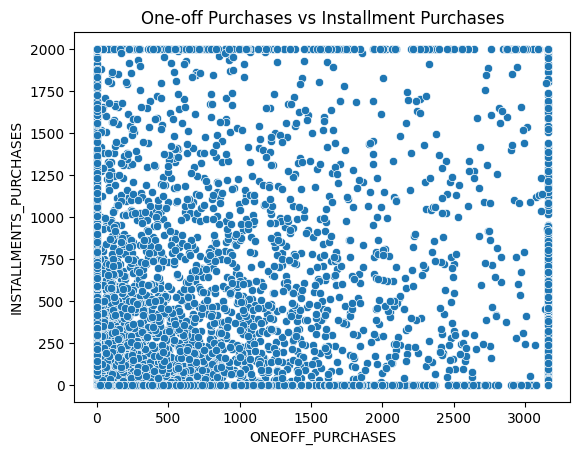

In [320]:
sns.scatterplot(x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', data=df)
plt.title('One-off Purchases vs Installment Purchases')
plt.show()

One-off Purchases vs Installment Purchases: Most customers appear to favor either one-off purchases or installment purchases rather than using both frequently, with fewer customers making large one-off purchases alongside frequent installment payments.

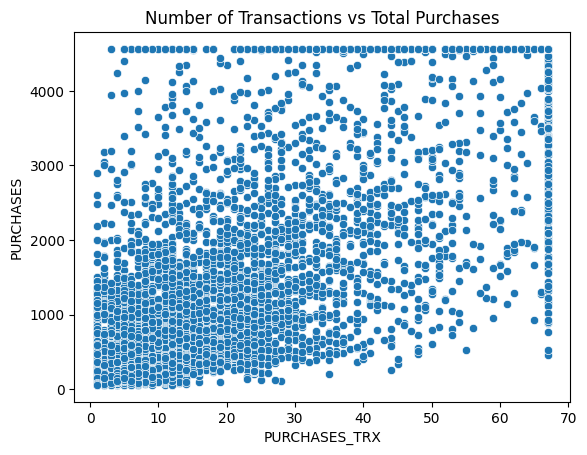

In [321]:
sns.scatterplot(x='PURCHASES_TRX', y='PURCHASES', data=df)
plt.title('Number of Transactions vs Total Purchases')
plt.show()

Number of Transactions vs Total Purchases: Customers with a higher number of transactions do not always correlate with higher total purchase amounts, suggesting that frequent transactions do not necessarily mean larger total spending.

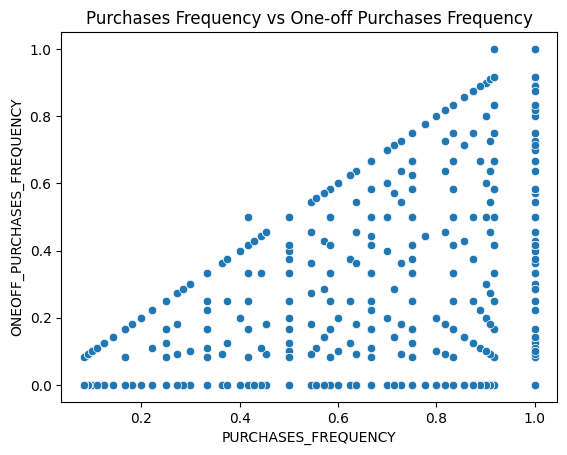

In [322]:
sns.scatterplot(x='PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES_FREQUENCY', data=df)
plt.title('Purchases Frequency vs One-off Purchases Frequency')
plt.show()

Purchases Frequency vs One-off Purchases Frequency: Customers with higher overall purchase frequencies still show variability in how often they make one-off purchases, indicating distinct purchasing patterns within frequent buyers.

**Credit Usage Relationships**

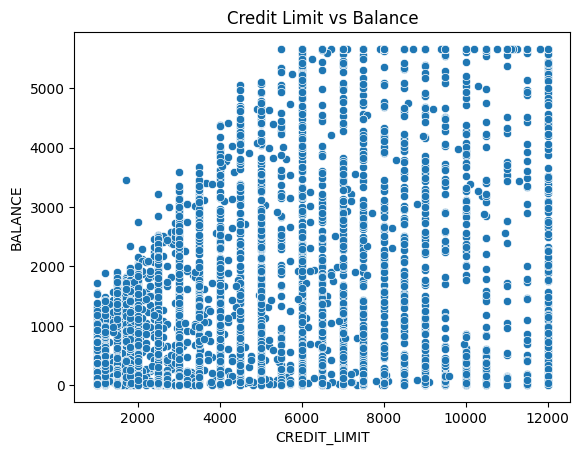

In [323]:
# Credit Limit vs Balance
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df)
plt.title('Credit Limit vs Balance')
plt.show()

Credit Limit vs Balance: Customers with higher credit limits tend to have higher balances, but there's a wide range of balances across all credit limits, showing no strict relationship between limit and balance.

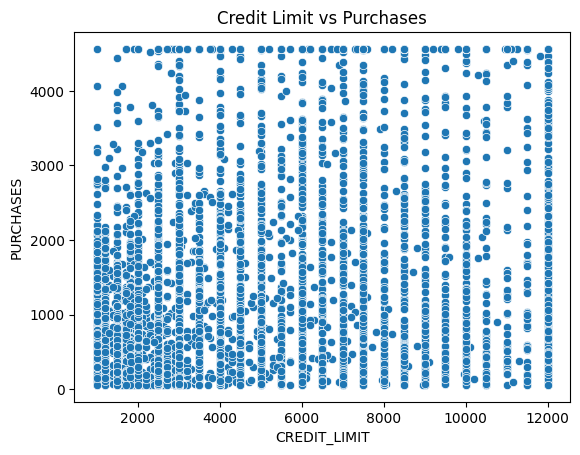

In [324]:
# Credit Limit vs Purchases
sns.scatterplot(x='CREDIT_LIMIT', y='PURCHASES', data=df)
plt.title('Credit Limit vs Purchases')
plt.show()

Credit Limit vs Purchases: The plot shows that customers with various credit limits make a wide range of purchases, indicating that credit limits do not strongly influence total purchase amounts.

**Cash Advance Behaviour**

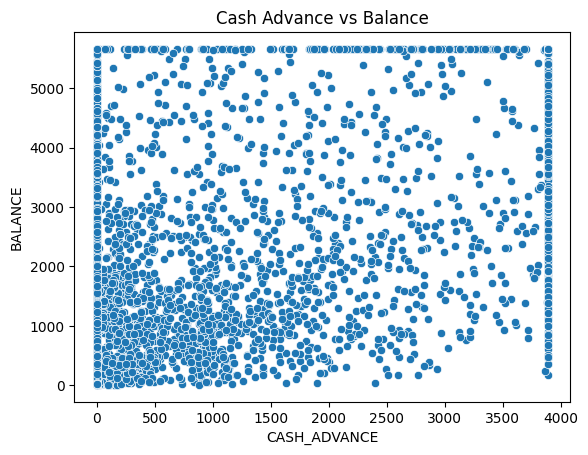

In [325]:
# Cash Advance vs Balance
sns.scatterplot(x='CASH_ADVANCE', y='BALANCE', data=df)
plt.title('Cash Advance vs Balance')
plt.show()

Cash Advance vs Balance: There is no clear relationship between cash advance amounts and balances, suggesting customers with both high and low balances use cash advances.

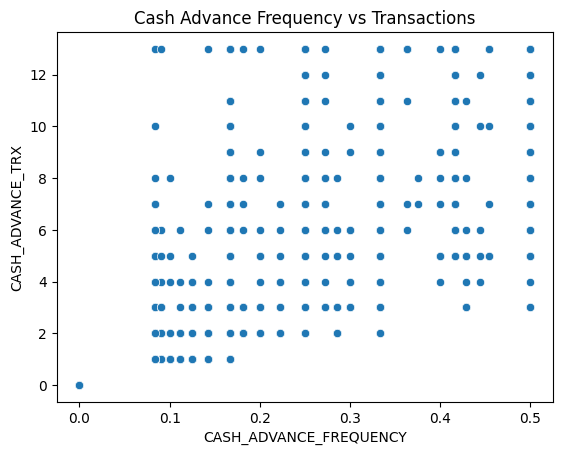

In [326]:
# Cash Advance Frequency vs Cash Advance Transactions
sns.scatterplot(x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', data=df)
plt.title('Cash Advance Frequency vs Transactions')
plt.show()

Cash Advance Frequency vs Transactions: Customers with higher cash advance frequency tend to make more transactions, although there are still a variety of behaviors across different levels of frequency.

**Payment Behaviour**

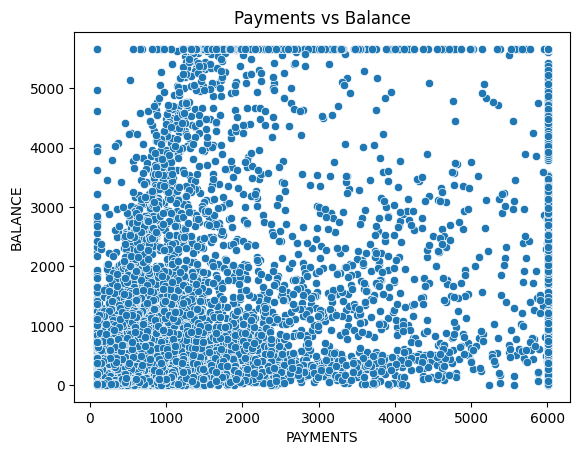

In [327]:
# Payments vs Balance
sns.scatterplot(x='PAYMENTS', y='BALANCE', data=df)
plt.title('Payments vs Balance')
plt.show()

Payments vs Balance: Higher payments are associated with a wide range of balances, suggesting that larger payments do not necessarily mean customers are paying off high balances.

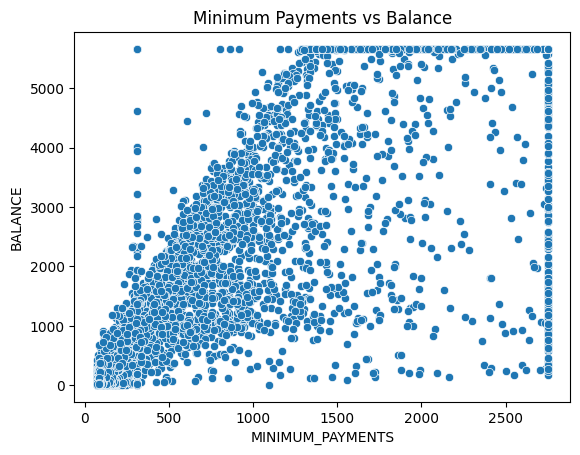

In [328]:
# Minimum Payments vs Balance
sns.scatterplot(x='MINIMUM_PAYMENTS', y='BALANCE', data=df)
plt.title('Minimum Payments vs Balance')
plt.show()

Minimum Payments vs Balance: Customers who make only minimum payments tend to have higher balances, indicating a risk of accumulating debt when not paying off more than the minimum amount.

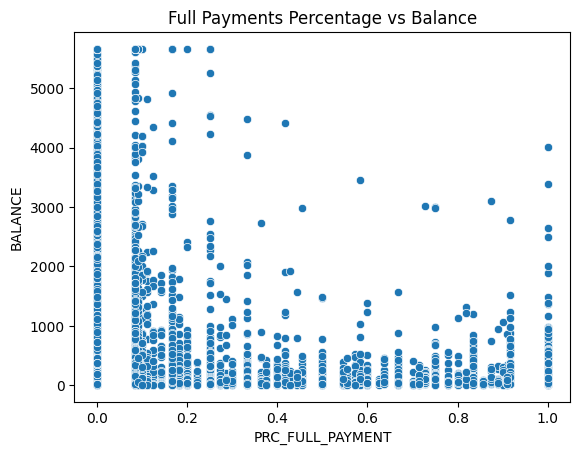

In [329]:
# Full Payments Percentage vs Balance
sns.scatterplot(x='PRC_FULL_PAYMENT', y='BALANCE', data=df)
plt.title('Full Payments Percentage vs Balance')
plt.show()

Full Payments Percentage vs Balance: Customers who make full payments tend to have lower balances, while those with low percentages of full payments have much higher balances.

**Customer Longevity**

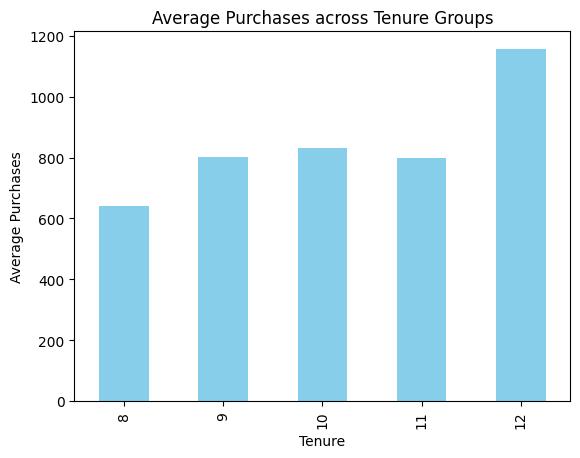

In [330]:
# Average Purchases across Tenure groups
df.groupby('TENURE')['PURCHASES'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Purchases across Tenure Groups')
plt.ylabel('Average Purchases')
plt.xlabel('Tenure')
plt.show()

Average Purchases across Tenure Groups: Customers with longer tenures (12 years) tend to make more purchases, with a steady increase in average purchases as tenure increases.

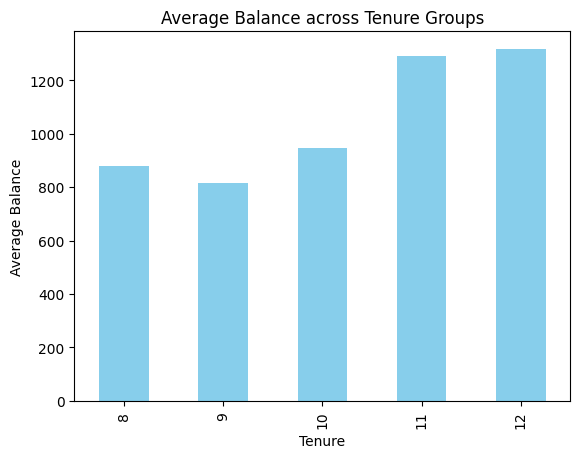

In [331]:
# Average Balance across Tenure groups
df.groupby('TENURE')['BALANCE'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Balance across Tenure Groups')
plt.ylabel('Average Balance')
plt.xlabel('Tenure')
plt.show()

Average Balance across Tenure Groups: Balances tend to increase as customer tenure grows, with customers who have been with the service for 11-12 years having the highest average balances.

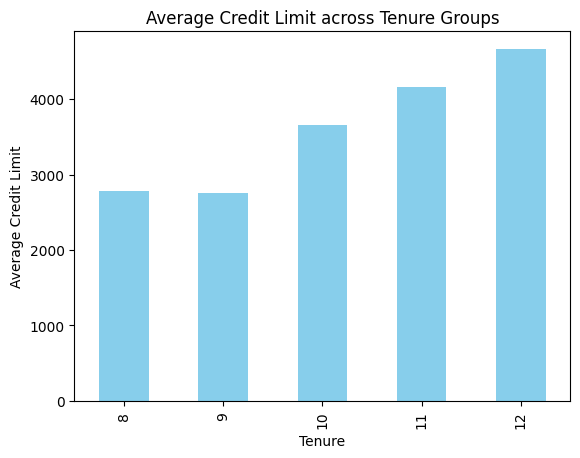

In [332]:
# Average Credit Limit across Tenure groups
df.groupby('TENURE')['CREDIT_LIMIT'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Credit Limit across Tenure Groups')
plt.ylabel('Average Credit Limit')
plt.xlabel('Tenure')
plt.show()

Average Credit Limit across Tenure Groups: Credit limits increase significantly as tenure grows, indicating that customers with longer tenure are trusted with higher credit limits.

# Data Preprocessing

In [339]:
# Select the most relevant features from the original dataset
selected_features = ['PAYMENTS', 'BALANCE', 'CREDIT_LIMIT',
                     'PURCHASES', 'INSTALLMENTS_PURCHASES',
                     'BALANCE_TO_CREDIT_RATIO', 'PAYMENTS_TO_PURCHASES_RATIO']

In [340]:
df_selected = df[selected_features]

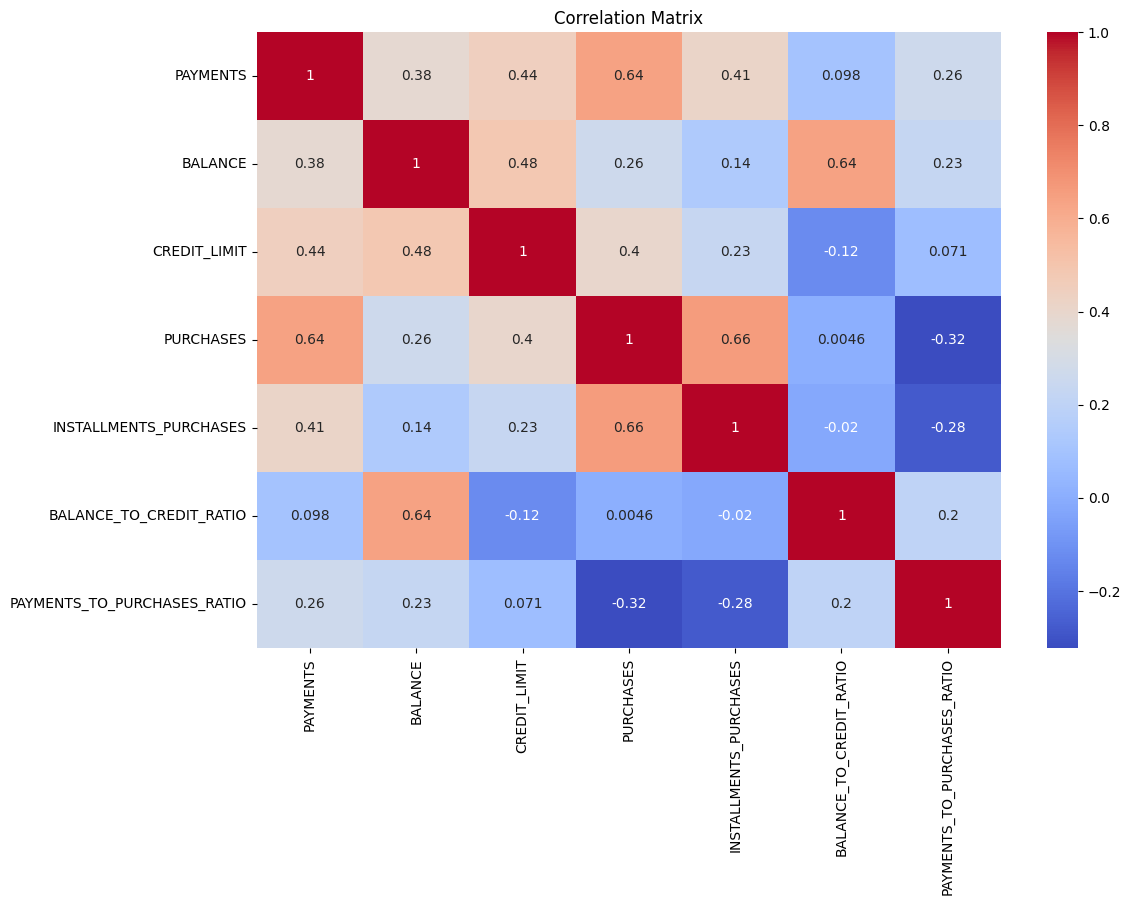

In [341]:
corr_matrix = df_selected.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [342]:
df_selected.head()

,PAYMENTS,BALANCE,CREDIT_LIMIT,PURCHASES,INSTALLMENTS_PURCHASES,BALANCE_TO_CREDIT_RATIO,PAYMENTS_TO_PURCHASES_RATIO
CUST_ID,,,,,,,
C10001,201.802084,40.900749,1000.0,95.40,95.40,0.040901,2.115326
C10003,622.066742,2495.148862,7500.0,773.17,0.00,0.332687,0.804567
C10004,92.865469,1666.670542,7500.0,1499.00,0.00,0.222223,0.255431
C10005,678.334763,817.714335,1200.0,56.00,0.00,0.681429,13.264551
C10006,1400.057770,1809.828751,1800.0,1333.28,1333.28,0.966761,1.050085


Scale Data

In [343]:
# Function to perform clustering and return silhouette score for KMeans
def kmeans_clustering(scaled_data, title):
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, kmeans_labels)


    return silhouette_avg

# Function to perform clustering and return silhouette score for GMM
def gmm_clustering(scaled_data, title):
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm_labels = gmm.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, gmm_labels)

    return silhouette_avg

# Function to perform clustering and return silhouette score for Agglomerative Clustering
def hierarchical_clustering(scaled_data, linkage, title):
    hierarchical = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    hierarchical_labels = hierarchical.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, hierarchical_labels)

    return silhouette_avg

# Function to perform clustering and return silhouette score for DBSCAN
def dbscan_clustering(scaled_data, eps_value, title):
    dbscan = DBSCAN(eps=eps_value, min_samples=10)
    dbscan_labels = dbscan.fit_predict(scaled_data)

    # Handle the case where silhouette_score fails due to having one cluster
    if len(set(dbscan_labels)) > 1:
        silhouette_avg = silhouette_score(scaled_data, dbscan_labels)
    else:
        silhouette_avg = -1  # Assign -1 if clustering is unsuccessful

    return silhouette_avg

In [344]:
# Applying different scalers and evaluating clustering algorithms
scalers = {
    'Standard Scaler': StandardScaler(),
    'MinMax Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}


In [345]:
# Iterate through scalers and clustering algorithms
results = {}
for name, scaler in scalers.items():
    # Step 1: Scale the data first
    df_scaled = scaler.fit_transform(df_selected)

    # Step 2: Perform clustering and evaluate silhouette score for each model

    # K-Means
    silhouette_kmeans = kmeans_clustering(df_scaled, name)

    # GMM (Gaussian Mixture Model)
    silhouette_gmm = gmm_clustering(df_scaled, name)

    # Hierarchical Clustering (Ward, Average, Complete linkages)
    silhouette_hierarchical_ward = hierarchical_clustering(df_scaled, 'ward', name)
    silhouette_hierarchical_average = hierarchical_clustering(df_scaled, 'average', name)
    silhouette_hierarchical_complete = hierarchical_clustering(df_scaled, 'complete', name)

    # DBSCAN (Choose eps based on prior analysis)
    silhouette_dbscan = dbscan_clustering(df_scaled, eps_value=0.07, title=name)

    # Store the results for each scaler and model
    results[name] = {
        'K-Means': silhouette_kmeans,
        'GMM': silhouette_gmm,
        'Hierarchical Ward': silhouette_hierarchical_ward,
        'Hierarchical Average': silhouette_hierarchical_average,
        'Hierarchical Complete': silhouette_hierarchical_complete,
        'DBSCAN': silhouette_dbscan
    }

# Display the results
for scaler_name, scores in results.items():
    print(f'\n{scaler_name}:')
    for model, score in scores.items():
        print(f'  {model} Silhouette Score: {score}')



Standard Scaler:
  K-Means Silhouette Score: 0.3431033834934753
  GMM Silhouette Score: 0.13243932590923366
  Hierarchical Ward Silhouette Score: 0.26494554151571276
  Hierarchical Average Silhouette Score: 0.32327644787108667
  Hierarchical Complete Silhouette Score: 0.3611309101476813
  DBSCAN Silhouette Score: -0.2616944711064624

MinMax Scaler:
  K-Means Silhouette Score: 0.34063170427319095
  GMM Silhouette Score: 0.1426124763748071
  Hierarchical Ward Silhouette Score: 0.31110207931066935
  Hierarchical Average Silhouette Score: 0.3148580948651101
  Hierarchical Complete Silhouette Score: 0.2817034323241909
  DBSCAN Silhouette Score: -0.23432742934702042

Robust Scaler:
  K-Means Silhouette Score: 0.42831067501267606
  GMM Silhouette Score: 0.10337494628978507
  Hierarchical Ward Silhouette Score: 0.39561046541003236
  Hierarchical Average Silhouette Score: 0.42706259799932855
  Hierarchical Complete Silhouette Score: 0.40316093150906435
  DBSCAN Silhouette Score: -0.30607023122

In [346]:
# Initialize Scaler
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_selected), columns=df_selected.columns)

In [347]:
df_scaled.head()

,PAYMENTS,BALANCE,CREDIT_LIMIT,PURCHASES,INSTALLMENTS_PURCHASES,BALANCE_TO_CREDIT_RATIO,PAYMENTS_TO_PURCHASES_RATIO
0,-0.440727,-0.335642,-0.520833,-0.406737,-0.219834,-0.267668,0.571775
1,-0.169679,1.118060,0.833333,0.145147,-0.371889,0.231485,-0.218173
2,-0.510986,0.627335,0.833333,0.736164,-0.371889,0.042517,-0.549118
3,-0.133389,0.124481,-0.479167,-0.438819,-0.371889,0.828073,7.291023
4,0.332083,0.712131,-0.354167,0.601224,1.753182,1.316185,-0.070208


# **Clustering Algorithms**

# K-Means Clustering

**Elbow Method**

In [348]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

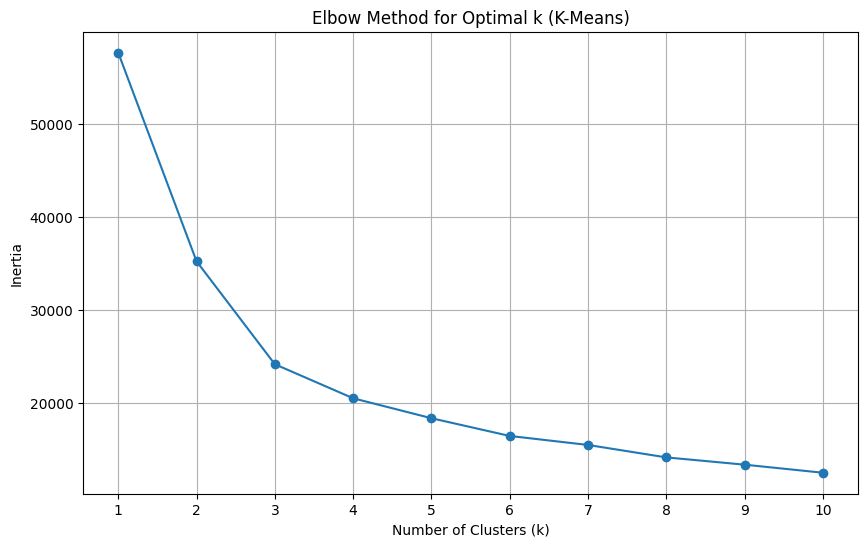

In [349]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()

Optimal number of clusters based on the elbow method is 3

In [350]:
optimal_k = 3

In [351]:
# Run K-means clustering model and fit it
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [352]:
# K-means Silhouette Score
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

Silhouette Score for K-Means: 0.42831067501267606


# Gaussian Mixture Model

In [353]:
# GMM Clustering
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

In [354]:
# GMM Silhouette Score
gmm_silhouette = silhouette_score(df_scaled, gmm_labels)
print(f'Silhouette Score for GMM: {gmm_silhouette}')

Silhouette Score for GMM: 0.10337494628978507


# Hierarchial Clustering

In [355]:
# Clustering with Ward linkage
hierarchical_ward = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_ward_labels = hierarchical_ward.fit_predict(df_scaled)

In [356]:
# Silhouette Score
ward_silhouette = silhouette_score(df_scaled, hierarchical_ward_labels)
print(f'Silhouette Score for Hierarchical Clustering (Ward Linkage): {ward_silhouette}')

Silhouette Score for Hierarchical Clustering (Ward Linkage): 0.39561046541003236


In [357]:
# Clustering with Complete linkage
hierarchical_complete = AgglomerativeClustering(n_clusters=optimal_k, linkage='complete')
hierarchical_complete_labels = hierarchical_complete.fit_predict(df_scaled)

In [358]:
# Silhouette Score
complete_silhouette = silhouette_score(df_scaled, hierarchical_complete_labels)
print(f'Silhouette Score for Hierarchical Clustering (Complete Linkage): {complete_silhouette}')


Silhouette Score for Hierarchical Clustering (Complete Linkage): 0.40316093150906435


In [359]:
# Clustering with Average linkage
hierarchical_average = AgglomerativeClustering(n_clusters=optimal_k, linkage='average')
hierarchical_average_labels = hierarchical_average.fit_predict(df_scaled)

In [360]:
# Silhouette Score
average_silhouette = silhouette_score(df_scaled, hierarchical_average_labels)
print(f'Silhouette Score for Hierarchical Clustering (Average Linkage): {average_silhouette}')

Silhouette Score for Hierarchical Clustering (Average Linkage): 0.42706259799932855


# **Hypertuning**

In [361]:
# Function to tune KMeans
def tune_kmeans(data, k_range):
    best_score = -1
    best_params = None
    for n_clusters in k_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        score = silhouette_score(data, kmeans_labels)
        print(f'KMeans with {n_clusters} clusters: Silhouette Score = {score}')
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters}
    return best_score, best_params

# Function to tune GMM (Gaussian Mixture)
def tune_gmm(data, n_components_range, cov_types):
    best_score = -1
    best_params = None
    for n_components in n_components_range:
        for cov_type in cov_types:
            gmm = GaussianMixture(n_components=n_components, covariance_type=cov_type, random_state=42)
            gmm_labels = gmm.fit_predict(data)
            score = silhouette_score(data, gmm_labels)
            print(f'GMM with {n_components} components and {cov_type} covariance: Silhouette Score = {score}')
            if score > best_score:
                best_score = score
                best_params = {'n_components': n_components, 'covariance_type': cov_type}
    return best_score, best_params


# Function to tune Hierarchical Clustering
def tune_hierarchical(data, n_clusters_range, linkages):
    best_score = -1
    best_params = None
    for n_clusters in n_clusters_range:
        for linkage in linkages:
            hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
            hierarchical_labels = hierarchical.fit_predict(data)
            score = silhouette_score(data, hierarchical_labels)
            print(f'Hierarchical with {n_clusters} clusters and {linkage} linkage: Silhouette Score = {score}')
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'linkage': linkage}
    return best_score, best_params

# Define the hyperparameter ranges
k_range = range(2, 10)  # Number of clusters for KMeans and Hierarchical
n_components_range = range(2, 10)  # Number of components for GMM
cov_types = ['full', 'tied', 'diag', 'spherical']  # Covariance types for GMM
linkages = ['ward', 'complete', 'average', 'single']

In [362]:
# Tuning KMeans
best_kmeans_score, best_kmeans_params = tune_kmeans(df_scaled, k_range)
print(f'Best KMeans Score: {best_kmeans_score}, Best Params: {best_kmeans_params}')

KMeans with 2 clusters: Silhouette Score = 0.5476424458503362
KMeans with 3 clusters: Silhouette Score = 0.42831067501267606
KMeans with 4 clusters: Silhouette Score = 0.36114300453287085
KMeans with 5 clusters: Silhouette Score = 0.2922553499821981
KMeans with 6 clusters: Silhouette Score = 0.2934470220684611
KMeans with 7 clusters: Silhouette Score = 0.299324085893411
KMeans with 8 clusters: Silhouette Score = 0.26995817408642525
KMeans with 9 clusters: Silhouette Score = 0.2650184780903741
Best KMeans Score: 0.5476424458503362, Best Params: {'n_clusters': 2}


In [363]:
# Tuning GMM
best_gmm_score, best_gmm_params = tune_gmm(df_scaled, n_components_range, cov_types)
print(f'Best GMM Score: {best_gmm_score}, Best Params: {best_gmm_params}')

GMM with 2 components and full covariance: Silhouette Score = 0.16364192496479352
GMM with 2 components and tied covariance: Silhouette Score = 0.5639890172467493
GMM with 2 components and diag covariance: Silhouette Score = 0.19456537465009346
GMM with 2 components and spherical covariance: Silhouette Score = 0.5556617953503992
GMM with 3 components and full covariance: Silhouette Score = 0.10337494628978507
GMM with 3 components and tied covariance: Silhouette Score = 0.4026735990781743
GMM with 3 components and diag covariance: Silhouette Score = 0.2615432494980692
GMM with 3 components and spherical covariance: Silhouette Score = 0.3661337274173663
GMM with 4 components and full covariance: Silhouette Score = 0.09529503204910648
GMM with 4 components and tied covariance: Silhouette Score = 0.3520909964555694
GMM with 4 components and diag covariance: Silhouette Score = 0.16669227723176197
GMM with 4 components and spherical covariance: Silhouette Score = 0.31021207193044337
GMM wit

In [364]:
# Tuning Hierarchical Clustering
best_hierarchical_score, best_hierarchical_params = tune_hierarchical(df_scaled, k_range, linkages)
print(f'Best Hierarchical Score: {best_hierarchical_score}, Best Params: {best_hierarchical_params}')

Hierarchical with 2 clusters and ward linkage: Silhouette Score = 0.5775112137535341
Hierarchical with 2 clusters and complete linkage: Silhouette Score = 0.5815345069415654
Hierarchical with 2 clusters and average linkage: Silhouette Score = 0.5804533862513749
Hierarchical with 2 clusters and single linkage: Silhouette Score = 0.4180500743601414
Hierarchical with 3 clusters and ward linkage: Silhouette Score = 0.39561046541003236
Hierarchical with 3 clusters and complete linkage: Silhouette Score = 0.40316093150906435
Hierarchical with 3 clusters and average linkage: Silhouette Score = 0.42706259799932855
Hierarchical with 3 clusters and single linkage: Silhouette Score = 0.3782690489225731
Hierarchical with 4 clusters and ward linkage: Silhouette Score = 0.3579825918251045
Hierarchical with 4 clusters and complete linkage: Silhouette Score = 0.3803397004810261
Hierarchical with 4 clusters and average linkage: Silhouette Score = 0.3842437554818799
Hierarchical with 4 clusters and sing

# Kmeans After Tuning

In [365]:
# Run K-means clustering model with params
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {kmeans_silhouette}')

Silhouette Score for K-Means: 0.42831067501267606


# GMM After Tuning

In [366]:
# GMM Clustering
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42)
gmm_labels = gmm.fit_predict(df_scaled)

# GMM Silhouette Score
gmm_silhouette = silhouette_score(df_scaled, gmm_labels)
print(f'Silhouette Score for GMM: {gmm_silhouette}')

Silhouette Score for GMM: 0.4026735990781743


# Hierarchial After Tuning

after tuning it said: Best Hierarchical Score: 0.5869415507982024, Best Params: {'n_clusters': 2, 'linkage': 'complete'}, but 2 clusters is too little for detailed segmentation. So i will do the highest silhouette score for 3 clusters



Hierarchical with 3 clusters and average linkage: Silhouette Score = 0.42706259799932855

In [367]:
# Clustering with Average linkage
hierarchical_average = AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical_average_labels = hierarchical_average.fit_predict(df_scaled)

# Silhouette Score
average_silhouette = silhouette_score(df_scaled, hierarchical_average_labels)
print(f'Silhouette Score for Hierarchical Clustering (Average Linkage): {average_silhouette}')

Silhouette Score for Hierarchical Clustering (Average Linkage): 0.42706259799932855


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use linkage method to generate the hierarchical linkage matrix
linkage_matrix = linkage(df_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Cluster Profiles

# K-Means Cluster Profiles

# GMM Cluster Profiles

# Hierachial Ward Linkage Cluster Profiles

**Principal Component Analysis (PCA)**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)

# Fit PCA on the scaled dataset and transform it
df_pca = pca.fit_transform(df_scaled)

# Convert PCA output back into a DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

In [ ]:
df_pca.head()